Author: Sean Tulin
<br>
Date: Mar. 20, 2023
<br>
PHYS 2030 W23

# <font color=#46769B>Lesson 10: Fourier series</font>

## <font color=#46769B>Introduction</font>

Any (reasonably well-behaved) periodic function can be represented as a sum of sine and cosine functions. This sum is known as a __Fourier series__.  Suppose we have a function $f(t)$ that is defined over an interval $0 \le t < T$. This can happen if:

1. $f(t)$ is a periodic function, with period $T$. That is, $f(t)$ repeats every interval $T$, so $f(t) = f(t + T) = f(t + 2T) = f(t + 3T)$, etc. 

2. $f(t)$ is just defined over a finite interval $[0,T]$.

We will consider the independent variable $t$ to be time, but the methods we discuss are of course more general.

The Fourier series is an expansion of $f(t)$ in terms of sines and cosines:

$$f(t) = a_0 + \sum_{n=1}^{\infty} \big( a_k \cos\left( \omega_k t \right) + b_k \sin\left( \omega_k t \right) \big) , \qquad (1)$$

where $\omega_k = 2\pi k/T$ is a frequency and $k = 0, 1, 2,$ etc, is a non-negative integer. $a_k$ and $b_k$ are numerical constants, known as __Fourier coefficients__, each of which depends on the index $k$. Each term in Eq. (1) is referred to as a __Fourier mode__.

In the case that $f(t)$ is periodic in $t$, it is clear that the right-hand side also repeats every interval $T$ since cosine and sine repeat for every multiple of $2\pi$.

It is beyond the scope of this course to prove Eq. (1). However, let's emphasize why this is an important result. 

- There is an important link between the __time domain__ and the __frequency domain__. That is, there are two equivalent ways to describe $f(t)$. Of course, we can have $f(t)$ itself as a function of $t$. Alternatively, we can know the Fourier frequencies $\omega_k$ and Fourier coefficients $a_k, b_k$, which tells how much each frequency contributions to the sum in Eq. (1). For some problems, it is advantageous to work in the frequency domain and this forms the basis of __signal processesing__, as we shall see.

- Fourier series is useful for solving *linear* ODEs (e.g., harmonic oscillator) with arbitrary periodic driving forces. By writing the driving force as a Fourier series and solving the ODE for each Fourier mode separately, we can construct the full solution as a sum over the responses to each mode. This is known as __linear response theory__, and we will see how this works in the exercises.

It is best to see how Fourier series works with a few examples. 


## <font color=#46769B>Example: Square wave</font>

The square wave is defined as follows:

$$f(t) = \left\{ \begin{array}{cc} 1 & {\rm for} \; 0 \le  t < \tfrac{T}{2} \\ 0 & {\rm for} \; \tfrac{T}{2} \le t < T \end{array} \right.$$

This is defined for one period only, $0 \le t < T$, and the function is repeated beyond that.

We can define and plot the square wave here. (We set $T=1$.) Let's explain a few piece of the code below:
- The function `square_wave` takes as input one number for `t` and returns either `0` or `1`. First, it checks that it falls within either of the intervals $0 \le  t < \tfrac{T}{2}$ or $\tfrac{T}{2} \le t < T$, returning $1$ or $0$, respectively. But if $t$ is either below or above these intervals, the function will add or subtract $T$ to $t$ and call itself again recursively.
- I know that `numpy.arrays` don't play well with `if` statements. So, I use a built-in function `numpy.vectorize` that allows me to new function `f` that can operate on `numpy.arrays`. It's as if I wrote a `for` loop that went through the `numpy.array` and acted on each element. (See documentation [here](https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html).)



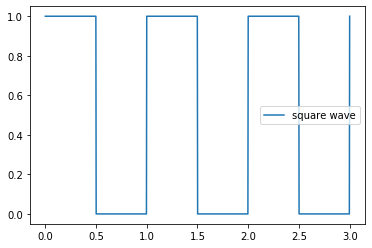

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,3,num=1000)
T = 1

def square_wave(t):
    if (t >= 0) & (t < T/2):
        return 1
    elif (t >= T/2) & (t < T):
        return 0
    elif t < 0:
        # Shift t up by one period
        return square_wave(t+T)
    else:
        # Shift t down by one period
        return square_wave(t-T)
    
f = np.vectorize(square_wave)

plt.plot(t,f(t),label='square wave')
plt.legend()
plt.show()


Now, let's see how to represent the square wave as a Fourier series. We need to know the Fourier coefficients $a_k$ and $b_k$. They are:

$$a_k = \left\{ \begin{array}{cc} \frac{1}{2} & {\rm for} \; k = 0 \\
0 & {\rm for} \; k > 0 \end{array} \right.$$

$$b_k = \left\{ \begin{array}{cc} \frac{2}{\pi k} & {\rm for\; odd} \; k > 0 \\ 0 & {\rm for\; even} \; k > 0 \end{array} \right.$$

We will derive these below, but for now let's see how the terms in the Fourier series add together to give the square wave.

In principle, we need to sum over an infinite number of terms in the Fourier series, which we cannot do in practice. We have to truncate the sum at some maximum value of $k$, which is an approximation. Here we write a function to calculate the Fourier series up to a maximum value of $k$.

Note because the square wave is a discontinuous function, the Fourier series exhibits a "ringing" effect known as [Gibbs' phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

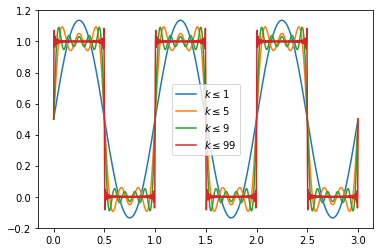

In [2]:
def Fourier_series(t,kmax):
    
    # First term (constant) in Fourier series
    a0 = 1/2
    f = a0
    
    # Sum over k > 0 terms in Fourier series
    for k in range(1,kmax+1,2):
        ak = 0
        bk = 2/(np.pi*k)
        f = f + ak*np.cos(2*np.pi*k*t/T) + bk*np.sin(2*np.pi*k*t/T)
        
    return f
    
plt.plot(t,Fourier_series(t,1),label=r'$k \leq 1$')
plt.plot(t,Fourier_series(t,5),label=r'$k \leq 5$')
plt.plot(t,Fourier_series(t,9),label=r'$k \leq 9$')
plt.plot(t,Fourier_series(t,99),label=r'$k \leq 99$')

plt.legend()
plt.show()    

## <font color=#46769B>Fourier series with complex exponentials</font>

A sine and cosine expansion is not the only type of Fourier series. It can also be written in terms of complex exponential functions

$$f(t) = \sum_{k = -\infty}^{\infty} c_k  \, e^{i \omega_k t} \qquad (2)$$

where the frequency is $\omega_k = 2\pi k/T$ as above. The main difference between Eqs. (1) and (2) is that here the sum runs over *any* integer value of $k$, i.e., both positive and negative integers are allowed.  

We can show that Eqs. (1) and (2) are equivalent. According to [Euler's formula](https://en.wikipedia.org/wiki/Euler%27s_formula), we have

$$e^{i \omega_k t} = \cos\left( \omega_k t \right) + i \sin\left( \omega_k t \right) \, .$$

The sum in Eq. (2) can be divided up into three terms: negative integers for $k$, $k=0$, and positive integers for $k$:

$$f(t) = \sum^{-1}_{k=-\infty} c_k \big( \cos\left( \omega_k t \right) + i \sin\left( \omega_k t  \right) \big) + c_0 + \sum_{k=1}^{\infty} c_k  \big( \cos\left( \omega_k t  \right) + i \sin\left( \omega_k t \right) \big) \, .$$

In the first term, we can relabel $k \to -k$ to write this as a sum over positive integers.

$$f(t) = \sum_{k=1}^{\infty} c_{-k} \big( \cos\left( -\omega_k t  \right) + i \sin\left( -\omega_k t  \right) \big) + c_0 + \sum_{k=1}^{\infty} c_k  \big( \cos\left( \omega_k t  \right) + i \sin\left( \omega_k t  \right) \big) \, .$$

Finally, we can combine the first and third terms together to get

$$f(t) = c_0 + \sum_{k=1}^{\infty} \big( (c_k + c_{-k}) \cos\left( \omega_k t  \right) + i(c_k - c_{-k}) \sin\left( \omega_k t  \right) \big) \, .$$

Comparing with Eq. (1), we have the correspondence

$$a_0 = c_0$$

$$\left. \begin{array}{c} a_k = (c_k + c_{-k}) \\ b_k = i(c_k - c_{-k}) \end{array} \right\} \; k > 0$$

$$\left. \begin{array}{c} c_k = \tfrac{1}{2} (a_k - i b_k) \\ c_{-k} = \tfrac{1}{2}  (a_k + i b_k) \end{array} \right\} \; k > 0$$

So, if you know if you know $a_k$ and $b_k$, you can convert to $c_k$ (and vice-versa).

If $f(t)$ is a *real* function, then all the Fourier coefficients $a_k$, $b_k$ must be real numbers. However, the Fourier coefficients $c_k$ need not be real, but they must satisfy

$$c_k = c_{-k}^*$$

where $^*$ denotes complex conjugation. That is,

$$c_{-k}^* = (a_k + i b_k)^* = a_k - i b_k = c_k \, .$$

As long as this is satisfied, our Fourier series for $f(t)$ will be *real* despite the fact that we are summing over *complex* exponentials.

### <font color=#46769B>Complex numbers in Python</font>

In dealing with Fourier coefficients (especially the $c_k$ variety), we will need to know how to handle complex numbers in Python. 

Here are some examples to show the syntax. Let's define two complex numbers $z_1 = 12 + 6i$ and $z_2 = 3.4 - 12.2i$:
```py
z1 = 12 + 6j
z2 = 3.4 - 12.2j
```
That is, you attach a `j` to the end of an integer or float to make an imaginary number. Note that you *cannot* write `j` by itself to represent just the imaginary unit $i$. You have to write
```py
z3 = 1j
```
to write $z_3 = i$.

In [3]:
print('Imaginary unit is:', 1j)
print('Imaginary unit squared is', 1j**2, '\n')

print("Now print 'j' by itself:")
print(j)

Imaginary unit is: 1j
Imaginary unit squared is (-1+0j) 

Now print 'j' by itself:


NameError: name 'j' is not defined

Let's see what we can do with complex numbers. (Further reading can be found [here](https://realpython.com/python-complex-numbers/).)

First, here is some basic arthimetic with complex numbers.

In [ ]:
z1 = 2 + 1j
z2 = 3.2 - 5.5j

print("Addition:", z1+z2)
print("Subtraction:", z1-z2)
print("Multiplication:", z1*z2)
print("Division:", z1/z2)

print("Real part:", z1.real)
print("Imaginary part:", z1.imag)

# Calculate magnitude and phase
mag = np.abs(z1)
phase = np.angle(z1)
print("Magnitude:", mag)
print("Phase:", phase)

# Getting back original complex number
print('Orginal complex number', mag * np.exp(1j * phase))

Next, we can also put complex numbers in `numpy.arrays`. As an example, consider Euler's formula

$$y(t) = e^{i t} = \cos(t) + i \sin(t) \, .$$

Let's plot the real and imaginary parts. We also plot the magnitude, which is just $|y(t)| = 1$.  We can also plot the phase or argument $\arg(y(t)) = t$. Because the phase only takes values from $-\pi$ to $\pi$, it appears to loop around from $\pi$ back to $-\pi$.

In [ ]:
t = np.linspace(0,10)
y = np.exp(1j*t)

plt.plot(t,y.real,label='real part (cos)')
plt.plot(t,y.imag,label='imaginary part (sin)')
plt.legend()
plt.show()

plt.plot(t,np.abs(y),label='magnitude')
plt.plot(t,np.angle(y),label='phase')
plt.legend()
plt.show()

## <font color=#46769B>Example: Square wave revisited</font>

Let's describe the square wave given above as a Fourier series of complex exponentials. According to our previous expressions, we have

$$c_k = \left\{ \begin{array}{cc} \tfrac{1}{2} & k = 0 \\
- \tfrac{i}{\pi k} & k \; {\rm odd} \\
0 & {\rm otherwise} \end{array} \right.$$

Let's code this up and compare to our original square wave again.

Note that because we are adding and subtracting complex numbers, Python will treat our result as *complex* even though in this case the imaginary part will be zero. Below, we will plot the real and imaginary parts separately. The real part is our square wave and the imaginary part is numerically zero, i.e., zero up to numerical accuracy.



In [ ]:
def Fourier_series(t,kmax):
    
    # First term (constant) in Fourier series
    c0 = 1/2
    f = c0
    
    # Sum over odd k > 0 terms in Fourier series
    for k in range(1,kmax+1,2):
        ck = - 1j/(np.pi*k)
        f = f + ck*np.exp(2j*np.pi*k*t/T)
        
    # Sum over odd k < 0 terms in Fourier series
    for k in range(-kmax,0,2):
        ck = - 1j/(np.pi*k)
        f = f + ck*np.exp(2j*np.pi*k*t/T)
        
    return f
    
    
plt.plot(t,Fourier_series(t,1).real,label=r'$k \leq 1$')
plt.plot(t,Fourier_series(t,5).real,label=r'$k \leq 5$')
plt.plot(t,Fourier_series(t,9).real,label=r'$k \leq 9$')
plt.plot(t,Fourier_series(t,99).real,label=r'$k \leq 99$')
plt.title('Real part')

plt.legend()
plt.show()   

plt.plot(t,Fourier_series(t,1).imag,label=r'$k \leq 1$')
plt.plot(t,Fourier_series(t,5).imag,label=r'$k \leq 5$')
plt.plot(t,Fourier_series(t,9).imag,label=r'$k \leq 9$')
plt.plot(t,Fourier_series(t,99).imag,label=r'$k \leq 99$')
plt.title('Imaginary part')

plt.legend()
plt.show()   

## <font color=#46769B>Appendix: Derivation of Fourier coefficients</font>

Here we will discuss the procedure for calculating Fourier coefficients given a function $f(t)$. For the square wave example, we simply pulled the coefficients out of a hat. Here we show how one would calculate them. This material is beyond the scope of this course, but it is good to be acquainted with the general idea.

### <font color=#46769B>Useful integrals</font>

First, we need to know several integral formulas, where $k,m$ are positive integers:

$$\frac{1}{T} \int_0^T dt \, \cos(2\pi k t/T) = 0 \qquad ({\rm A}1)$$

$$\frac{1}{T} \int_0^T dt \, \sin(2\pi k t/T) = 0 \qquad ({\rm A}2)$$

$$\frac{2}{T} \int_0^T dt \, \cos(2\pi k t/T) \cos(2\pi m t/T) = \delta_{km} \qquad ({\rm A}3)$$

$$\frac{2}{T} \int_0^T dt \, \sin(2\pi k t/T) \sin(2\pi m t/T) = \delta_{km} \qquad ({\rm A}4)$$

$$\frac{2}{T} \int_0^T dt \, \sin(2\pi k t/T) \cos(2\pi m t/T) = 0 \, .\qquad ({\rm A}5)$$

Lastly, we have one more integral formula where $m,k$ can be *any* integer.

$$\frac{1}{T} \int_0^T dt \, e^{2\pi i k t/T} e^{-2\pi i m t/T} = \delta_{km} \, . \qquad ({\rm A}6) $$

The quantity $\delta_{km}$ is the __Kronecker delta__, defined as

$$\delta_{km} = \left\{ \begin{array}{cc} 1 & k=m \\ 0 & k \ne m \end{array} \right. .$$ 

Eqs. (A1) and (A2) are straightforward to prove. To prove the remaining relations, it is useful to start with (A6). There are two situations to consider. First, if $k = m$, then

$$\frac{1}{T} \int_0^T dt \, e^{2\pi i k t/T} e^{-2\pi i m t/T} = \frac{1}{T} \int_0^T dt = 1$$

since the two exponentials cancel each other. On the other hand, if $k \ne m$, this integral is instead

$$\frac{1}{T} \int_0^T dt \, e^{2\pi i k t/T} e^{-2\pi i m t/T} = \frac{1}{T} \int_0^T dt \, e^{2\pi i (k- m) t/T} 
= \frac{1}{2\pi i (k-m) } \left( e^{2\pi i (k- m)} - 1 \right) = 0$$

since $2\pi(k-m)$ is an integer multiple of $2\pi$. These two cases are combined in Eq. (A6).

The remaining formulas follow by expanding sines and cosines in terms of complex exponentials.
We use Euler's formula

$$e^{i \theta} = \cos\theta + i \sin\theta$$

to write

$$\cos\theta = \frac{1}{2} \left( e^{i \theta} + e^{-i \theta}\right) , \quad \sin\theta = \frac{1}{2i} \left( e^{i \theta} - e^{-i \theta}\right) \, .$$

Now, for example, the integral in Eq. (A3) is

$$\frac{2}{T} \int_0^T dt \, \cos(2\pi k t/T) \cos(2\pi m t/T) =  \frac{1}{2T} \int_0^T dt \, \left( e^{2\pi i k t/T} + e^{-2\pi i k t/T}\right)\left( e^{2\pi i m t/T} + e^{-2\pi i m t/T}\right) \, .$$

Expanding out all the terms, we have four terms to integrate and they all follow from Eq. (A6):

$$\frac{2}{T} \int_0^T dt \, \cos(2\pi k t/T) \cos(2\pi m t/T) = \frac{1}{2} \left( \delta_{k,-m} + \delta_{km} + \delta_{-k,-m} + \delta_{-k,m}\right)\, .$$

In deriving (A3), we take $k,m$ to be *positive* integers. Thus, the first and fourth terms are *always* zero since $k = -m$ or $-k =m$ are never satisfied. But the second and third terms are satisfied if $k=m$ and each contribute $\delta_{km}$ inside the parentheses. Therefore we have

$$\frac{2}{T} \int_0^T dt \, \cos(2\pi k t/T) \cos(2\pi m t/T) = \frac{1}{2} \left( \delta_{km} + \delta_{km} \right) = \delta_{km} \, .$$

Eqs. (A4) and (A5) can be derived similarly.


### <font color=#46769B>Fourier's trick</font>

We can obtain the Fourier coefficients through a process known as __Fourier's trick__, using the integrals we have derived above. The trick is to take various integrals of Eq. (1) to *project out* each Fourier coefficient.

Get $a_0$:

$$\frac{1}{T} \int_0^T dt \, f(t) = \frac{1}{T} \int_0^T dt \,  \left[ a_0 + \sum_{k=1}^{\infty} \big( a_k \cos\left( \omega_k t \right) + b_k \sin\left( \omega_k t \right) \big) \right] = a_0$$

where the expression in square brackets is the Fourier series in Eq. (1). According to Eqs. (A1) and (A2), only the constant $a_0$ survives in the integral.

Get $a_m$ ($m>0$):

$$\frac{2}{T} \int_0^T dt \, \cos(\omega_m t) \, f(t) = \frac{2}{T} \int_0^T dt \, \cos(\omega_m t) \,  \left[ a_0 + \sum_{k=1}^{\infty} \big( a_k \cos\left( \omega_k t \right) + b_k \sin\left( \omega_k t \right) \big) \right] = a_m \, ,$$

where $\omega_k = 2\pi k/T$ and similarly $\omega_m = 2\pi m/T$. According to Eqs. (A3) and (A5), only one term in the Fourier series, $a_k$ with $k=m$, survives in the integral.

Get $b_m$ ($m>0$):

$$\frac{2}{T} \int_0^T dt \, \sin(\omega_m t) \, f(t) = \frac{2}{T} \int_0^T dt \, \sin(\omega_m t) \,  \left[ a_0 + \sum_{k=1}^{\infty} \big( a_k \cos\left( \omega_k t \right) + b_k \sin\left( \omega_k t \right) \big) \right] = b_m\, .$$

According to Eqs. (A4) and (A5), only one term in the Fourier series, $b_k$ with $k=m$, survives in the integral.

We can use a similar trick to calculate the Fourier coefficients $c_m$ for Eq. (2), for any value of $k$. Taking the following integral and expanding $f(t)$ as in Eq. (2), we have

$$\frac{1}{T} \int_0^T dt \, e^{-i\omega_m t} \, f(t) = 
\frac{1}{T} \int_0^T dt \, e^{-i\omega_m t} \, \left( \sum_{k=-\infty}^\infty c_k \, e^{i\omega_k t} \right) = c_m \, .$$

According to (A6), only one term survives, that with $k=m$.

### <font color=#46769B>Summary</font>

Now that we have gone through all the derivation, let's summarize the formulas for calculating Fourier coefficients. (We relabel $m \to k$.)

$$a_0 = \frac{1}{T} \int_0^T dt \, f(t)$$

$$a_k = \frac{2}{T} \int_0^T dt \, \cos(\omega_k t) \, f(t)$$

$$b_k = \frac{2}{T} \int_0^T dt \, \sin(\omega_k t) \, f(t)$$

$$c_k = \frac{1}{T} \int_0^T dt \, e^{-i \omega_k t} \, f(t)  $$

where as usual $\omega_k = 2\pi k/T$. Note that the constant piece $a_0$ (and $c_0$) is just the mean value of $f(t)$. It is an exercise to the reader to derive the Fourier coefficients for the square wave given above.
